In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

In [14]:
# Load Dataset
df = pd.read_csv("train.csv")

In [15]:
# Quick View of Data
print("Shape of dataset:", df.shape)
print(df.dtypes)
print("\nFirst 5 rows:")
print(df.head())


Shape of dataset: (891, 12)
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.

## Data Cleaning


In [16]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [17]:
# Handle missing values
df["Age"].fillna(df["Age"].median(), inplace=True)   # Replace Age NaN with median
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

In [18]:
# Drop Cabin (too many missing values)
df.drop(columns=['Cabin'], inplace=True)

# Drop unnecessary columns
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

# Check remaining columns
print("\nColumns after dropping:\n", df.columns)



Columns after dropping:
 Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


In [19]:
# Convert categorical columns
df["Sex"] = df["Sex"].astype("category")
df["Embarked"] = df["Embarked"].astype("category")

In [20]:
#Summary Statistics
print("\nSummary statistics:")
print(df.describe(include="all"))


Summary statistics:
          Survived      Pclass   Sex         Age       SibSp       Parch  \
count   891.000000  891.000000   891  891.000000  891.000000  891.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   577         NaN         NaN         NaN   
mean      0.383838    2.308642   NaN   29.361582    0.523008    0.381594   
std       0.486592    0.836071   NaN   13.019697    1.102743    0.806057   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    2.000000   NaN   22.000000    0.000000    0.000000   
50%       0.000000    3.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   35.000000    1.000000    0.000000   
max       1.000000    3.000000   NaN   80.000000    8.000000    6.000000   

              Fare Embarked  
count   891.000000      891  
unique

In [21]:
# Group-based Insights
print("\nSurvival rate by Gender:")
print(df.groupby("Sex")["Survived"].mean())

print("\nSurvival rate by Passenger Class:")
print(df.groupby("Pclass")["Survived"].mean())

print("\nSurvival rate by Embarkation Port:")
print(df.groupby("Embarked")["Survived"].mean())



Survival rate by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Survival rate by Passenger Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Survival rate by Embarkation Port:
Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


## Visualizations

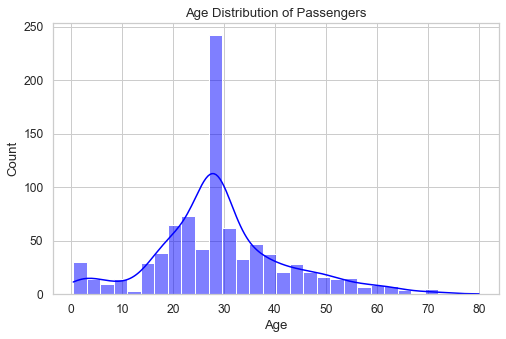

In [82]:
# Histogram for Age
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=30, kde=True, color="blue")
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

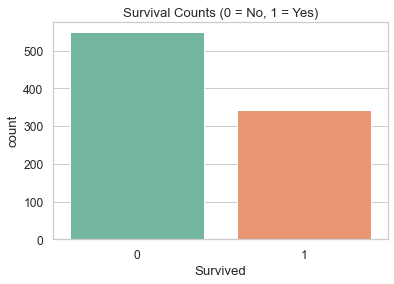

In [25]:
# Survival counts
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Survived", palette="Set2")
plt.title("Survival Counts (0 = No, 1 = Yes)")
plt.show()


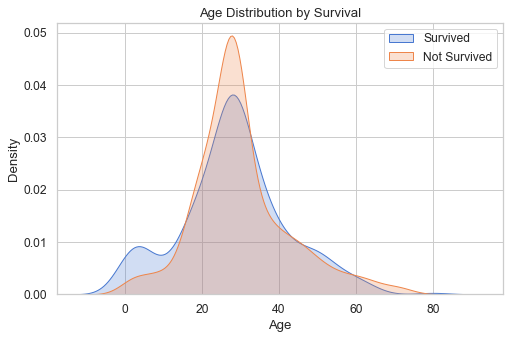

In [26]:
# Age distribution by Survival
plt.figure(figsize=(8,5))
sns.kdeplot(data=df[df["Survived"]==1]["Age"], label="Survived", shade=True)
sns.kdeplot(data=df[df["Survived"]==0]["Age"], label="Not Survived", shade=True)
plt.title("Age Distribution by Survival")
plt.legend()
plt.show()

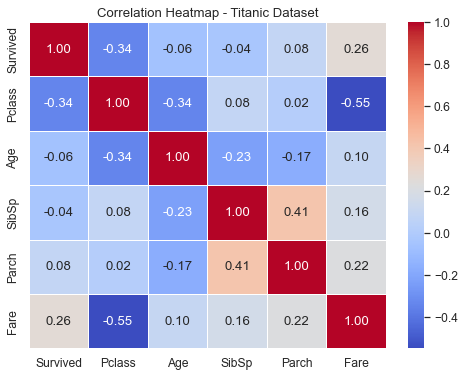

Correlation with Survival:
 Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.064910
Pclass     -0.338481
Name: Survived, dtype: float64


In [29]:
# Select only numeric columns (exclude objects & categories)
numeric_df = df.select_dtypes(include=['int64','float64'])

# Correlation matrix
corr = numeric_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap - Titanic Dataset")
plt.show()

# Correlation of features with survival
survival_corr = corr["Survived"].sort_values(ascending=False)
print("Correlation with Survival:\n", survival_corr)


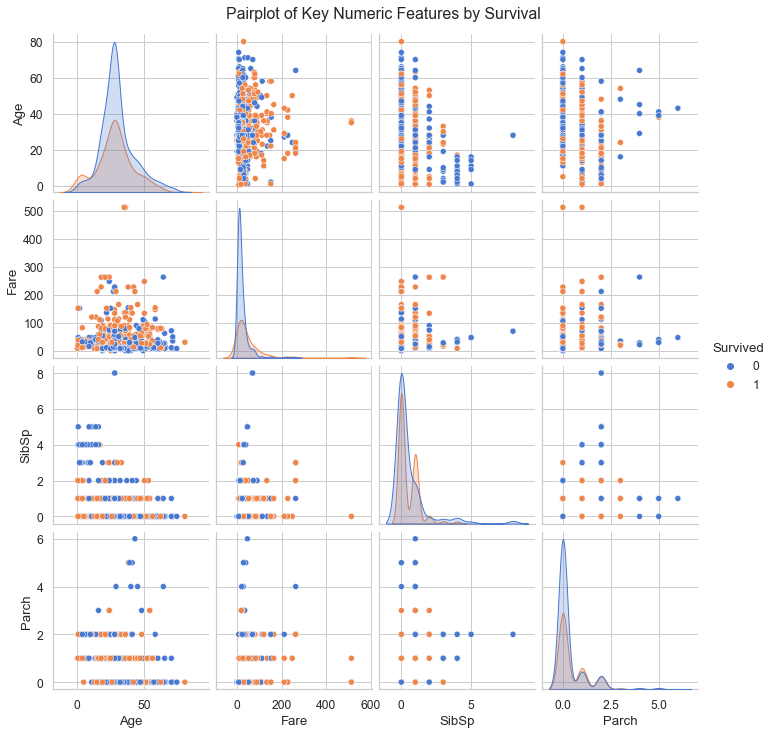

In [31]:
# Select only numeric + survival column for pairplot
sns.pairplot(df[["Survived", "Age", "Fare", "SibSp", "Parch"]], 
             hue="Survived", palette="muted", diag_kind="kde")

plt.suptitle("Pairplot of Key Numeric Features by Survival", y=1.02)
plt.show()


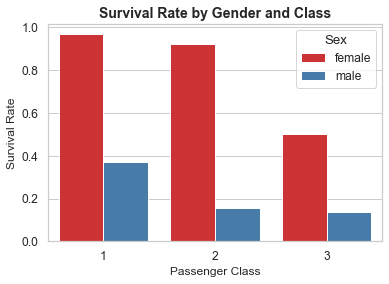

In [62]:
# Survival rate by Gender and Class
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=df, palette="Set1", ci=None)
plt.title("Survival Rate by Gender and Class", fontsize=14, fontweight="bold")
plt.xlabel("Passenger Class", fontsize=12)
plt.ylabel("Survival Rate", fontsize=12)
plt.legend(title="Sex", loc="upper right")
plt.show()


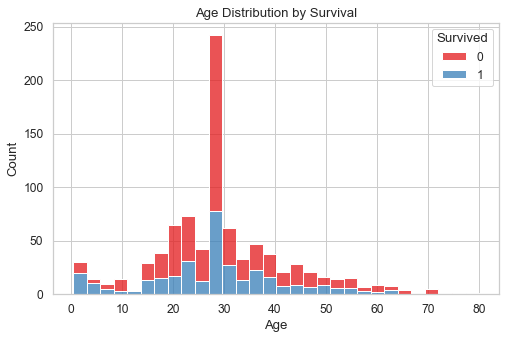

In [79]:
# Age distribution by Survival
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="Age", hue="Survived", bins=30, multiple="stack", palette="Set1")
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


## BAR PLOTS

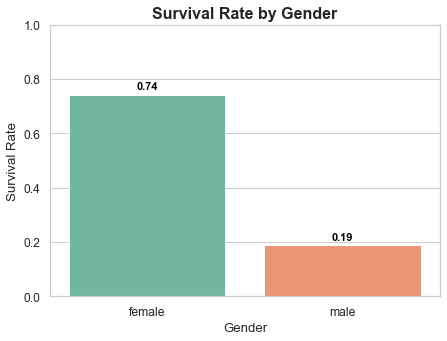

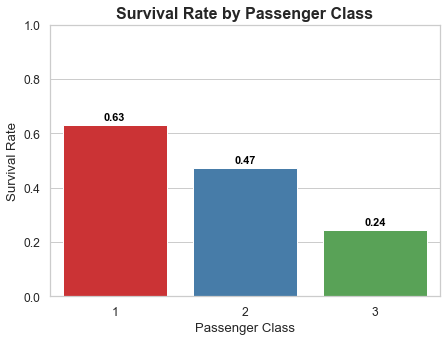

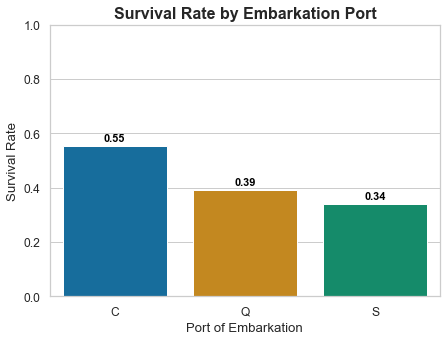

In [70]:
def add_bar_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 8), textcoords='offset points',
                    fontsize=11, color='black', weight='bold')

# Survival by Gender 
plt.figure(figsize=(7,5))
ax = sns.barplot(x="Sex", y="Survived", data=df, palette="Set2", ci=None)
add_bar_labels(ax)
plt.title("Survival Rate by Gender", fontsize=16, weight="bold")
plt.ylabel("Survival Rate")
plt.xlabel("Gender")
plt.ylim(0,1)
plt.show()


# Survival by Passenger Class
plt.figure(figsize=(7,5))
ax = sns.barplot(x="Pclass", y="Survived", data=df, palette="Set1", ci=None, order=[1,2,3])
add_bar_labels(ax)
plt.title("Survival Rate by Passenger Class", fontsize=16, weight="bold")
plt.ylabel("Survival Rate")
plt.xlabel("Passenger Class")
plt.ylim(0,1)
plt.show()

# Survival by Embarkation Port             
plt.figure(figsize=(7,5))
ax = sns.barplot(x="Embarked", y="Survived", data=df, palette="colorblind", ci=None, order=df.groupby("Embarked")["Survived"].mean().sort_values(ascending=False).index)
add_bar_labels(ax)
plt.title("Survival Rate by Embarkation Port", fontsize=16, weight="bold")
plt.ylabel("Survival Rate")
plt.xlabel("Port of Embarkation")
plt.ylim(0,1)
plt.show()

### Heatmap

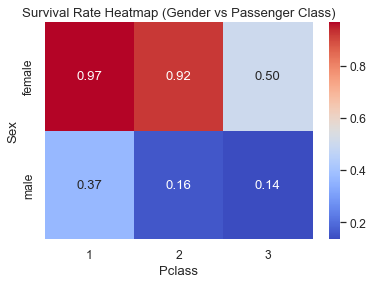

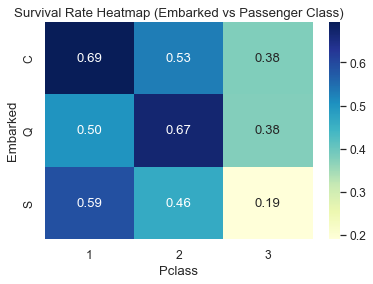

In [37]:

# Create a pivot table: Survival rate by Class and Gender
pivot_gender_class = df.pivot_table(values="Survived", index="Sex", columns="Pclass", aggfunc="mean")

sns.heatmap(pivot_gender_class, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Survival Rate Heatmap (Gender vs Passenger Class)")
plt.show()

# Create a pivot table: Survival rate by Class and Embarked
pivot_embark_class = df.pivot_table(values="Survived", index="Embarked", columns="Pclass", aggfunc="mean")

sns.heatmap(pivot_embark_class, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Survival Rate Heatmap (Embarked vs Passenger Class)")
plt.show()
